Iteración 1: x = 100.0, f(x) = 970099.0
Iteración 2: x = 67.00455766810653, f(x) = 287421.5546044976
Iteración 3: x = 45.009926065596666, f(x) = 85151.64374336696
Iteración 4: x = 30.35039723527028, f(x) = 25223.076156622286
Iteración 5: x = 20.582860416480248, f(x) = 7468.634520318185
Iteración 6: x = 14.079716839009599, f(x) = 2209.5053464848224
Iteración 7: x = 9.757835905944379, f(x) = 652.2076251031732
Iteración 8: x = 6.898518561069087, f(x) = 191.4272950525605
Iteración 9: x = 5.028701696557697, f(x) = 55.330187134373084
Iteración 10: x = 3.843680657951718, f(x) = 15.30811830079546
Iteración 11: x = 3.1559707952275144, f(x) = 3.709463570275677
Iteración 12: x = 2.8454158843448356, f(x) = 0.593842355835478
Iteración 13: x = 2.773143092634202, f(x) = 0.0285402881796184
Iteración 14: x = 2.7693029596247096, f(x) = 7.838698133211253e-05
Iteración 15: x = 2.7692923543194023, f(x) = 5.96992677515118e-10

Raíz encontrada para estimación inicial 100: 2.7692923542386314
Iteración 1: x = 

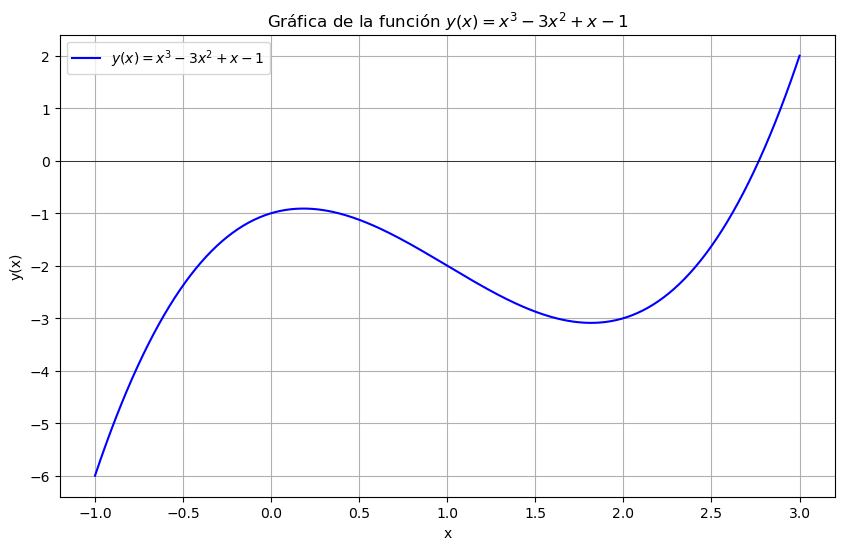

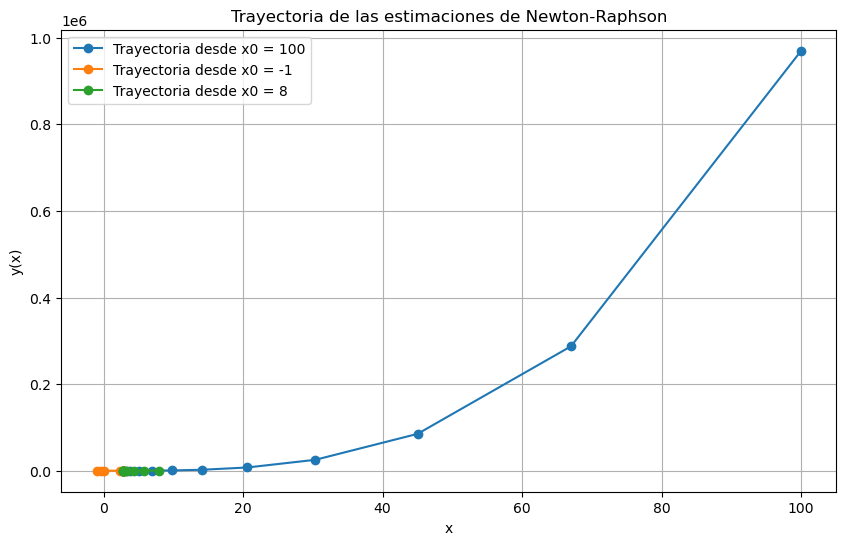

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from typing import List, Tuple

def f(x: float) -> float:
    return x**3 - 3 * x**2 + x - 1

def f_prima(x: float) -> float:
    return 3 * x**2 - 6 * x + 1

class Trajectory:
    def __init__(self):
        self.x_values = []

    def track(self, x):
        self.x_values.append(x)
        print(f"Iteración {len(self.x_values)}: x = {x}, f(x) = {f(x)}")
        return f(x)

initial_guesses = [100, -1, 8]
all_x_values = []

for x0 in initial_guesses:
    trajectory = Trajectory()
    root = newton(func=trajectory.track, x0=x0, fprime=f_prima, tol=1e-8, maxiter=100)
    all_x_values.append(trajectory.x_values)
    print(f"\nRaíz encontrada para estimación inicial {x0}: {root}")

x_vals = np.linspace(-1, 3, 400)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$y(x) = x^3 - 3x^2 + x - 1$', color='blue')
plt.axhline(0, color='black', lw=0.5)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.title("Gráfica de la función $y(x) = x^3 - 3x^2 + x - 1$")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for i, x_values in enumerate(all_x_values):
    y_trajectory = [f(x) for x in x_values]
    plt.plot(x_values, y_trajectory, marker='o', linestyle='-', label=f'Trayectoria desde x0 = {initial_guesses[i]}')

plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.title("Trayectoria de las estimaciones de Newton-Raphson")
plt.grid()
plt.show()